# Aviation Risk Analysis Project

## Introduction
The goal of this project is to identify the lowest risk aircraft for a company looking to invest in the aviation industry. This analysis will help the company make informed decisions about which aircraft to purchase.


In [3]:
import pandas as pd

# Load the dataset with a different encoding
df = pd.read_csv('data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)

# Display the first few rows of the dataframe
df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values in key columns
key_columns = ['Aircraft.Category', 'Injury.Severity', 'Country']
df = df.dropna(subset=key_columns)

# Convert 'Event.Date' to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Drop rows where 'Event.Date' could not be converted properly
df = df.dropna(subset=['Event.Date'])

# Extract the year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year



Missing values in each column:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publicat

In [8]:

# Number of accidents per year
accidents_per_year = df.groupby('Year').size()
print("Number of accidents per year:\n", accidents_per_year)

# Risk assessment by aircraft category
severity_counts = df.groupby(['Aircraft.Category', 'Injury.Severity']).size().unstack(fill_value=0)

# Assuming 'Fatal' is a category within 'Injury.Severity', if not, adjust accordingly
severity_counts['Risk_Score'] = severity_counts.get('Fatal', 0) / (severity_counts.sum(axis=1) + 1)
severity_counts = severity_counts.sort_values(by='Risk_Score', ascending=False)

print("Risk assessment by aircraft category:\n", severity_counts)


# Group by Country and Injury Severity
country_severity_counts = df.groupby(['Country', 'Injury.Severity']).size().unstack(fill_value=0)

# Calculate top 20 risky regions by accident frequency
top_risky_regions = df.groupby('Country').size().reset_index(name='Accident_Count')
top_risky_regions['Risk_Score'] = top_risky_regions['Accident_Count'] / top_risky_regions['Accident_Count'].sum()
top_risky_regions = top_risky_regions.sort_values(by='Accident_Count', ascending=False).head(10)

print("Top risky regions:\n", top_risky_regions)


Number of accidents per year:
 Year
1979       1
1982    3553
1983      11
1984       8
1985       8
1986       9
1987       5
1988      13
1989       8
1990      21
1991      17
1992       7
1993      10
1994      16
1995      17
1996      14
1997      44
1998      55
1999      53
2000      54
2001     106
2002     102
2003     223
2004     592
2005     831
2006     827
2007    1136
2008    1858
2009    1733
2010    1708
2011    1769
2012    1726
2013    1482
2014    1490
2015    1522
2016    1573
2017    1558
2018    1595
2019    1525
2020    1319
2021    1373
2022    1419
dtype: int64
Risk assessment by aircraft category:
 Injury.Severity    Fatal  Fatal(1)  Fatal(10)  Fatal(11)  Fatal(113)  \
Aircraft.Category                                                      
WSFT                   6         0          0          0           0   
Rocket                 1         0          0          0           0   
Unknown                6         1          0          0           0   
Weight

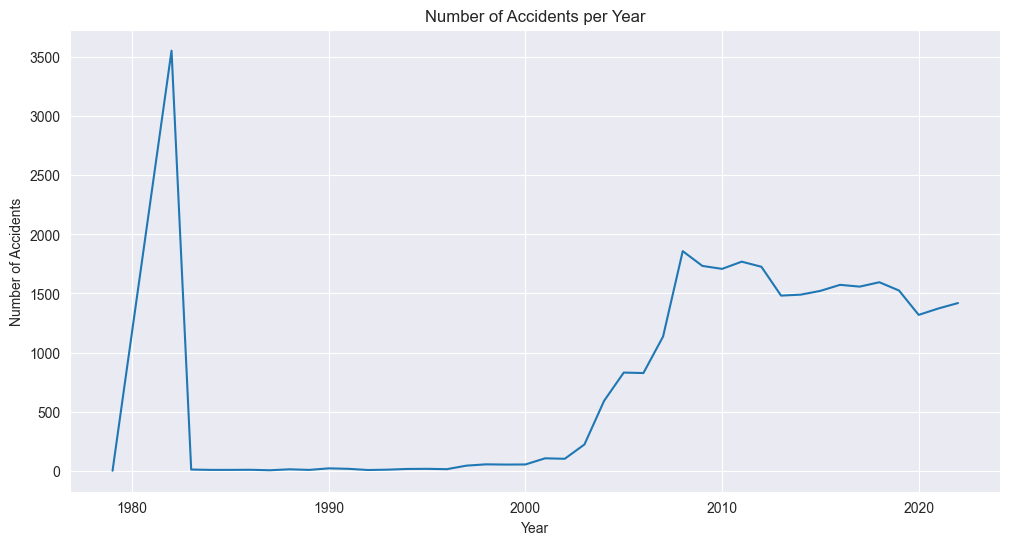

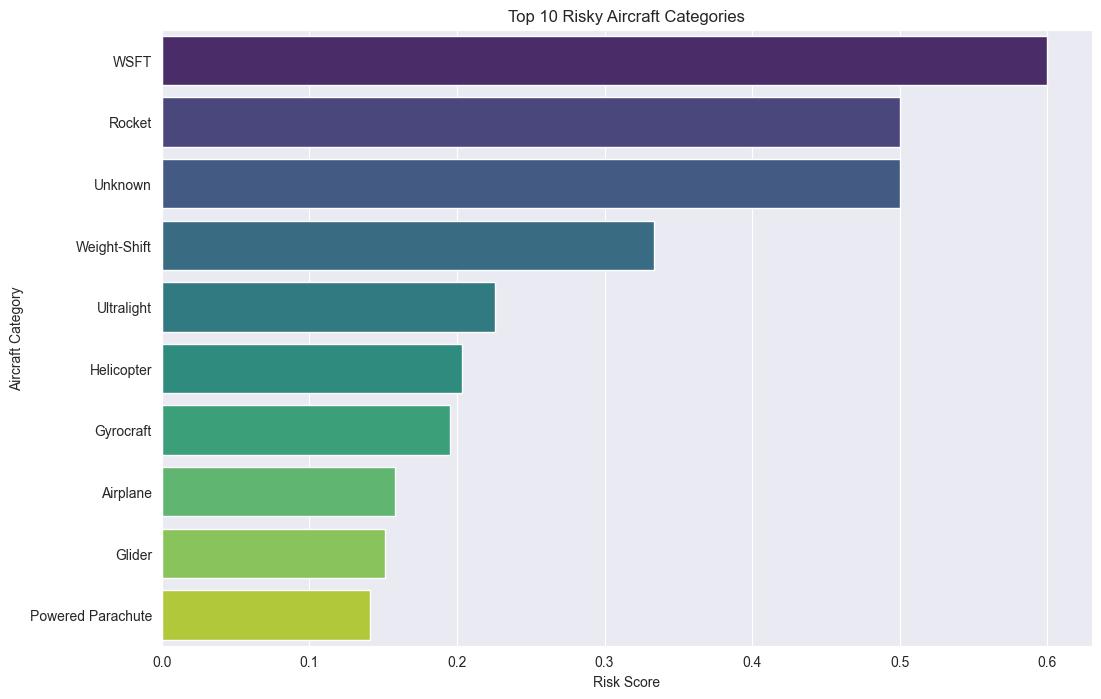

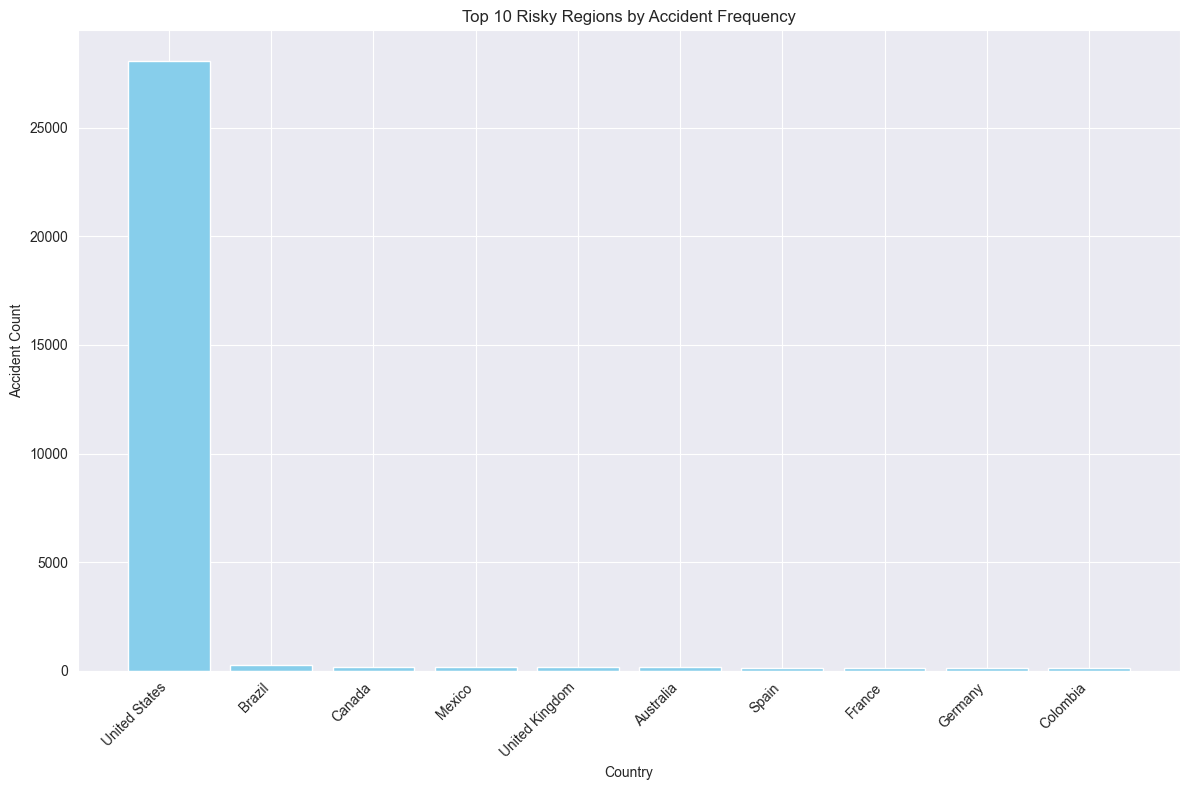

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot accidents per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

# Plot top 10 risky aircraft categories
top_risky_aircraft = severity_counts.head(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Risk_Score', y='Aircraft.Category', hue='Aircraft.Category', data=top_risky_aircraft, palette='viridis', dodge=False)
plt.title('Top 10 Risky Aircraft Categories')
plt.xlabel('Risk Score')
plt.ylabel('Aircraft Category')
plt.legend([], frameon=False)  # To remove the legend
plt.show()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_risky_regions['Country'], top_risky_regions['Accident_Count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Accident Count')
plt.title('Top 10 Risky Regions by Accident Frequency')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.tight_layout()
plt.show()

## Conclusions and Recommendations

Based on the analysis, the following recommendations are made for the company:
1. **Invest in aircraft types with the lowest risk scores:** Focus on purchasing aircraft types that have a lower incidence of severe accidents.
2. **Focus on regions with fewer accidents:** Consider starting operations in regions with historically fewer aviation incidents.
3. **Implement safety measures for moderate-risk aircraft:** For aircraft types with moderate risk, invest in additional safety measures and training.

These recommendations will help the company make data-driven decisions in their new aviation endeavor.
